## KPI Propuesto: Incremento del Acceso a Internet en Hogares por Provincia

Este KPI mide el crecimiento proyectado del acceso a Internet en hogares por cada 100 hogares en cada provincia, con el objetivo de incrementar el acceso en un 2% para el próximo trimestre. Este análisis nos ayudará a identificar las provincias que más se benefician de este incremento y en qué áreas es necesario enfocar esfuerzos para mejorar la conectividad.

#### Formula del KPI:
KPI = ((Nuevo Acceso - Acceso Actual) / Acceso Actual) * 100 

**Donde:**

- **Nuevo acceso:** número de hogares con acceso a Internet proyectado para el próximo trimestre.
- **Acceso actual:** número de hogares con acceso a Internet en el trimestre actual.
Ejemplo de cálculo:

Si en el trimestre actual el número de hogares con acceso a Internet es de 500, y se proyecta un aumento a 510 hogares, entonces:

KPI = ((510 - 500) / 500) * 100 = 2%

Este resultado indica un aumento del 2% en el acceso a Internet para la provincia en el próximo trimestre.


## Carga del Dataset de Acceso a Internet

Cargamos el dataset procesado de accesos a internet por provincia y tecnología. Esto nos permitirá realizar un análisis exploratorio de los datos y calcular el KPI de incremento de acceso a internet en los hogares.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Cargar el archivo Parquet de accesos a internet procesado
accesos_internet = pd.read_parquet('data/processed/internet_accesos_tecnologia.parquet')

# Mostrar las primeras filas del dataset para verificar la carga
print(accesos_internet.head())

    Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2019          2     Buenos Aires  214055     2722466       1849476   
1  2019          2  Capital Federal   54102     1144781        230402   
2  2019          2        Catamarca    4951       10303         58355   
3  2019          2            Chaco    9448       57935         68944   
4  2019          2           Chubut   25955       80704         26516   

   Wireless  Otros    Total  
0    138638  64745  4989380  
1      4493  29821  1463599  
2      1384     81    75074  
3      8407   2358   147092  
4     31118   9930   174223  


## Agrupación y Filtrado de Datos por Provincia y Trimestre

Agrupamos los datos por `Provincia`, `Año` y `Trimestre` para obtener el total de accesos en cada trimestre. Luego, filtramos los datos para el último trimestre disponible. Esto nos permitirá calcular el KPI de incremento de acceso proyectado para el próximo trimestre.


In [28]:
# Agrupar por provincia y trimestre para obtener la suma de accesos por trimestre en cada provincia
accesos_provincia = accesos_internet.groupby(['Provincia', 'Año', 'Trimestre'])['Total'].sum().reset_index()

# Filtrar el último trimestre disponible
ultimo_ano = accesos_provincia['Año'].max()
ultimo_trimestre = accesos_provincia[accesos_provincia['Año'] == ultimo_ano]['Trimestre'].max()
accesos_ultimo_trimestre = accesos_provincia[(accesos_provincia['Año'] == ultimo_ano) & 
                                             (accesos_provincia['Trimestre'] == ultimo_trimestre)]

# Verificar los datos
print(accesos_ultimo_trimestre.head())

          Provincia   Año  Trimestre     Total
4      Buenos Aires  2019          4  37771952
8   Capital Federal  2019          4  14249596
12        Catamarca  2019          4    437433
16            Chaco  2019          4   1133108
20           Chubut  2019          4   1094401


## Cálculo del Acceso Proyectado y del KPI de Incremento

Calculamos el acceso proyectado para el próximo trimestre con un incremento del 2%, seguido del cálculo del KPI, que refleja el incremento en porcentaje en cada provincia. Este KPI nos permite medir el crecimiento esperado en el acceso a internet en los hogares.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo Parquet de accesos a internet procesado
accesos_internet = pd.read_parquet('data/processed/internet_accesos_tecnologia.parquet')

# Agrupar por provincia y trimestre para obtener la suma de accesos por trimestre en cada provincia
accesos_provincia = accesos_internet.groupby(['Provincia', 'Año', 'Trimestre'])['Total'].sum().reset_index()

# Filtrar el último trimestre disponible
ultimo_ano = accesos_provincia['Año'].max()
ultimo_trimestre = accesos_provincia[accesos_provincia['Año'] == ultimo_ano]['Trimestre'].max()
accesos_ultimo_trimestre = accesos_provincia[(accesos_provincia['Año'] == ultimo_ano) & 
                                             (accesos_provincia['Trimestre'] == ultimo_trimestre)].copy()  # Usar .copy() para evitar advertencias

# Calcular el acceso proyectado con un incremento del 2%
accesos_ultimo_trimestre['Nuevo Acceso'] = accesos_ultimo_trimestre['Total'] * 1.02

# Calcular el KPI de incremento en porcentaje para cada provincia
accesos_ultimo_trimestre['KPI Incremento (%)'] = ((accesos_ultimo_trimestre['Nuevo Acceso'] - accesos_ultimo_trimestre['Total']) / accesos_ultimo_trimestre['Total']) * 100

# Mostrar los datos calculados
print(accesos_ultimo_trimestre[['Provincia', 'Total', 'Nuevo Acceso', 'KPI Incremento (%)']].head())



          Provincia     Total  Nuevo Acceso  KPI Incremento (%)
4      Buenos Aires  37771952   38527391.04                 2.0
8   Capital Federal  14249596   14534587.92                 2.0
12        Catamarca    437433     446181.66                 2.0
16            Chaco   1133108    1155770.16                 2.0
20           Chubut   1094401    1116289.02                 2.0


## Visualización del KPI: Comparación de Acceso Actual y Proyectado por Provincia

En el siguiente gráfico de barras, se compara el acceso actual a internet en los hogares con el acceso proyectado, que incluye un aumento del 2% según el KPI propuesto. Las barras rojas representan el número de accesos actuales, mientras que las barras azules muestran el número proyectado de accesos después del incremento. Este gráfico facilita la visualización del crecimiento esperado en cada provincia y permite identificar las áreas que podrían beneficiarse más de este incremento en el próximo trimestre.


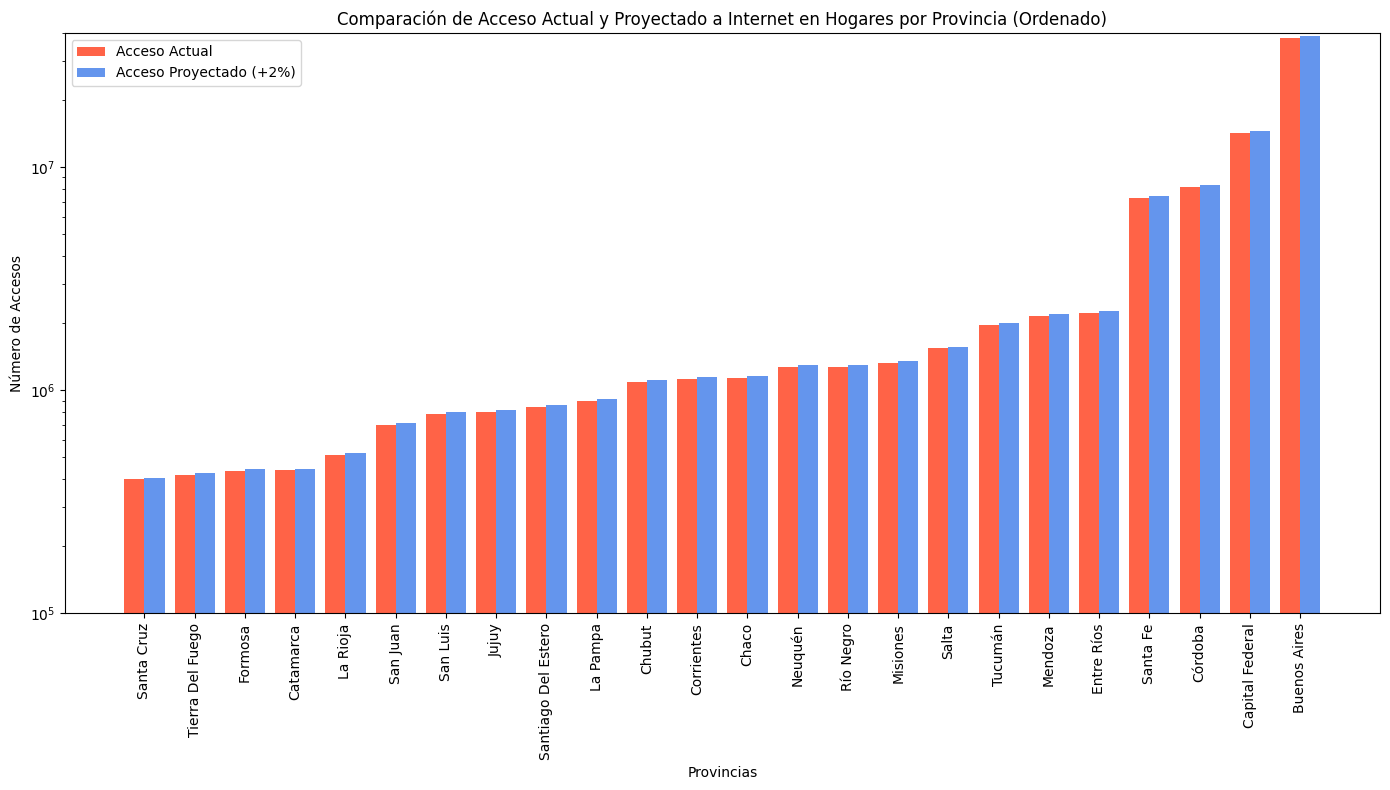

In [30]:

# Ordenar el DataFrame por el número de accesos actuales de menor a mayor
accesos_ultimo_trimestre_sorted = accesos_ultimo_trimestre.sort_values(by='Total')

# Gráfico de barras para comparar Acceso Actual y Proyectado con ajustes de escala
plt.figure(figsize=(14, 8))
x = np.arange(len(accesos_ultimo_trimestre_sorted['Provincia']))

plt.bar(x - 0.2, accesos_ultimo_trimestre_sorted['Total'], width=0.4, color='Tomato', label='Acceso Actual')
plt.bar(x + 0.2, accesos_ultimo_trimestre_sorted['Nuevo Acceso'], width=0.4, color='CornflowerBlue', label='Acceso Proyectado (+2%)')

# Escala logarítmica en el eje Y
plt.yscale('log')

# Ajustes de límites en el eje Y (opcional)
plt.ylim(1e5, 4e7)

# Etiquetas y título
plt.xlabel('Provincias')
plt.ylabel('Número de Accesos')
plt.title('Comparación de Acceso Actual y Proyectado a Internet en Hogares por Provincia (Ordenado)')
plt.xticks(x, accesos_ultimo_trimestre_sorted['Provincia'], rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Observaciones Clave del Gráfico de Comparación de Acceso Actual y Proyectado

1. **Diferencias de Acceso entre Provincias**: Las provincias están ordenadas de menor a mayor en términos de accesos actuales a internet en hogares. Esto permite observar claramente cómo las provincias con menos acceso, como Catamarca y La Pampa, siguen mostrando niveles significativamente bajos en comparación con provincias con mayor infraestructura, como Buenos Aires y Capital Federal.

2. **Impacto del Incremento Proyectado**: El incremento proyectado del 2% en el acceso a internet afecta a todas las provincias de manera proporcional. Sin embargo, su impacto es más visible en términos absolutos en provincias con mayor cantidad de accesos, como Buenos Aires, mientras que en provincias de menor acceso el aumento es menos notable visualmente.

3. **Perspectiva de Equidad Regional**: A pesar del crecimiento proyectado, persisten disparidades significativas en el acceso a internet entre las provincias. Provincias como La Rioja y Catamarca requieren políticas de apoyo adicional para reducir la brecha digital y asegurar un acceso más equitativo a los servicios de internet.

4. **Provincias con Mayor Incremento Absoluto**: Provincias como Buenos Aires y Capital Federal muestran el mayor aumento absoluto en accesos proyectados debido a su alta base actual. Esto enfatiza la importancia de abordar las necesidades de infraestructura en estas áreas para soportar el crecimiento esperado.

5. **Provincias con Menor Incremento Absoluto**: En contraste, provincias con menor acceso como Catamarca y La Pampa muestran un aumento en términos relativos, pero el impacto en términos absolutos es modesto, sugiriendo que una inversión más focalizada podría ser necesaria.

### Impacto en la Toma de Decisiones
- **Priorización de Infraestructura en Provincias con Menor Acceso:** La visualización del KPI ayuda a identificar provincias con menor acceso donde el incremento proyectado no es suficiente para reducir la brecha digital, sugiriendo la necesidad de medidas específicas para estas áreas.

- **Asignación Eficiente de Recursos:** La disparidad en el impacto del crecimiento proyectado indica que un enfoque diferenciado en la distribución de recursos podría fomentar una infraestructura de internet más equitativa en todo el país.

### Conclusión

El análisis del KPI de incremento en el acceso a internet en hogares, con un incremento proyectado del 2%, demuestra que mientras todas las provincias experimentan un crecimiento proporcional, las diferencias en términos absolutos entre provincias persisten. Esto sugiere que, si bien el incremento uniforme es positivo, podría no ser suficiente para cerrar la brecha digital en provincias con menor acceso. Una estrategia combinada, que incluya tanto el crecimiento proporcional como un enfoque específico en áreas menos favorecidas, podría ser más efectiva para fomentar un acceso equitativo al internet en todo el país.

-------------------------

## Análisis del Acceso Promedio a Internet por Región

Aca agrupamos las provincias en regiones (Buenos Aires y CABA, NOA, NEA, Centro, Patagonia y Cuyo) y calculamos el acceso promedio de internet por cada 100 hogares en cada región. Este análisis nos permite comparar el nivel de acceso a internet en diferentes regiones de Argentina y observar las áreas con mayor y menor acceso.


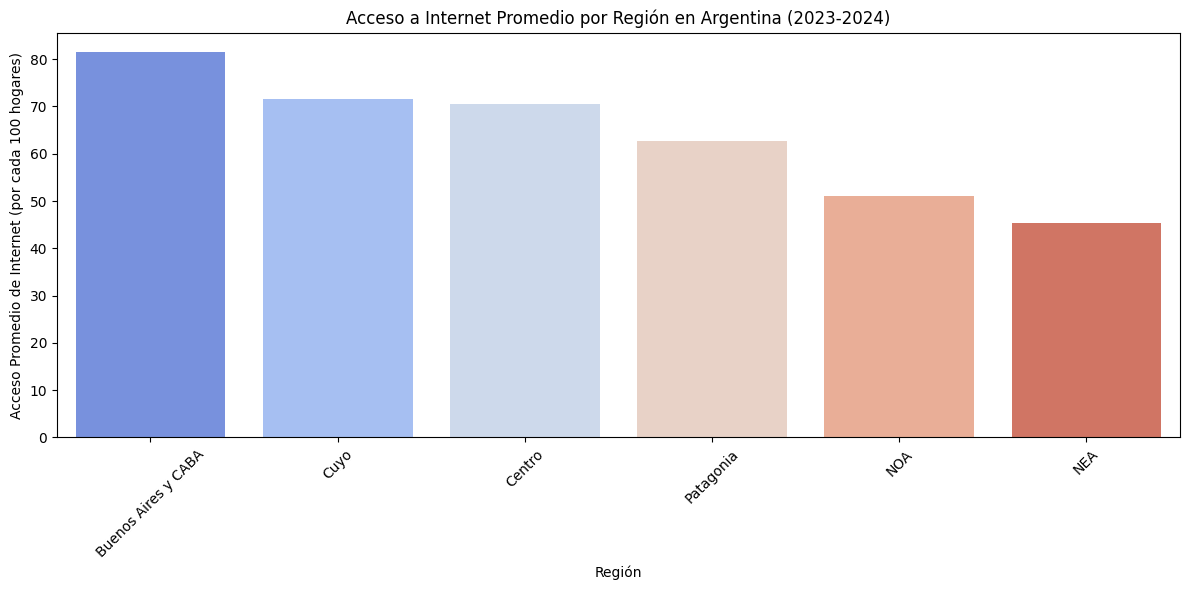

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Definimos las listas de provincias por región
buenos_aires_caba = ['Buenos Aires', 'CABA']
noa = ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Tucumán']
nea = ['Chaco', 'Corrientes', 'Formosa', 'Misiones']
centro = ['Córdoba', 'Entre Ríos', 'Santa Fe']
patagonia = ['Chubut', 'La Pampa', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego']
cuyo = ['Mendoza', 'San Juan', 'San Luis']

# Diccionario de provincias con su región correspondiente
provincias_regiones = {
    'Buenos Aires': 'Buenos Aires y CABA',
    'CABA': 'Buenos Aires y CABA',
    'Catamarca': 'NOA',
    'Jujuy': 'NOA',
    'La Rioja': 'NOA',
    'Salta': 'NOA',
    'Santiago del Estero': 'NOA',
    'Tucumán': 'NOA',
    'Chaco': 'NEA',
    'Corrientes': 'NEA',
    'Formosa': 'NEA',
    'Misiones': 'NEA',
    'Córdoba': 'Centro',
    'Entre Ríos': 'Centro',
    'Santa Fe': 'Centro',
    'Chubut': 'Patagonia',
    'La Pampa': 'Patagonia',
    'Neuquén': 'Patagonia',
    'Río Negro': 'Patagonia',
    'Santa Cruz': 'Patagonia',
    'Tierra del Fuego': 'Patagonia',
    'Mendoza': 'Cuyo',
    'San Juan': 'Cuyo',
    'San Luis': 'Cuyo'
}

# Datos de acceso por cada 100 hogares para cada provincia
accesos_por_provincia = {
    'Buenos Aires': 75, 'CABA': 88, 'Catamarca': 45, 'Chaco': 40, 'Córdoba': 70, 'Corrientes': 49,
    'Formosa': 48, 'Jujuy': 57, 'La Pampa': 55, 'La Rioja': 64, 'Mendoza': 73, 'Misiones': 44,
    'Neuquén': 71, 'Río Negro': 73, 'Salta': 44, 'San Juan': 71, 'San Luis': 71, 'Santa Cruz': 44,
    'Santa Fe': 71, 'Santiago del Estero': 46, 'Tierra del Fuego': 70, 'Tucumán': 50
}

# Crear DataFrame combinando provincias, regiones y acceso por cada 100 hogares
df_accesos = pd.DataFrame({
    'provincia': list(accesos_por_provincia.keys()),
    'region': [provincias_regiones[provincia] for provincia in accesos_por_provincia.keys()],
    'accesos_por_100_hogares': list(accesos_por_provincia.values())
})

# Calcular el acceso promedio de internet por región
acceso_promedio_region = df_accesos.groupby('region')['accesos_por_100_hogares'].mean().reset_index()
acceso_promedio_region = acceso_promedio_region.sort_values(by='accesos_por_100_hogares', ascending=False)

# Configuración de colores
sns.set_palette("coolwarm")

# Gráfico: Acceso a Internet Promedio por Región
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='accesos_por_100_hogares', data=acceso_promedio_region, palette="coolwarm", legend=False)
plt.xlabel('Región')
plt.ylabel('Acceso Promedio de Internet (por cada 100 hogares)')
plt.title('Acceso a Internet Promedio por Región en Argentina (2023-2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Observaciones Clave del Gráfico de Acceso Promedio de Internet por Región:

- **Diferencias Significativas entre Regiones:**

La región de Buenos Aires y CABA presenta el mayor acceso a internet, con un promedio superior al resto de las regiones. Esto es esperable debido a la infraestructura avanzada y la alta demanda en estas áreas urbanas.
Centro y Patagonia también muestran un acceso relativamente alto en comparación con el promedio nacional, lo cual refleja una cobertura razonablemente estable en estas áreas.

- **Regiones con Menor Acceso:**

Las regiones del NOA y NEA muestran el menor acceso a internet por cada 100 hogares, destacando una importante brecha digital en el norte del país. Esto sugiere que estas regiones enfrentan desafíos significativos en términos de infraestructura y acceso.
La región de Cuyo se encuentra en un nivel intermedio, pero también podría beneficiarse de mejoras en su infraestructura.

- **Necesidad de Estrategias Diferenciadas:**

Las diferencias observadas subrayan la necesidad de enfoques regionales para mejorar el acceso a internet. Por ejemplo, mientras que el NOA y NEA requieren inversiones más significativas en infraestructura básica, otras regiones como Buenos Aires y CABA podrían enfocarse en mejorar la calidad y velocidad de sus conexiones.

### Impacto en la Toma de Decisiones

- **Asignación Estratégica de Recursos:**

Las regiones del NOA y NEA, al mostrar el menor acceso a internet, deberían ser prioritarias para inversiones en infraestructura y programas de conectividad. Focalizar los recursos en estas áreas ayudaría a reducir la brecha digital y a promover un acceso equitativo en el país.

- **Políticas de Inclusión Digital:**

Dada la brecha identificada entre Buenos Aires y las regiones del norte, es importante diseñar políticas públicas que fomenten la inclusión digital en las regiones más rezagadas. Esto puede incluir incentivos para proveedores de servicios de internet y subsidios para el desarrollo de infraestructura.

### Conclusión
Este análisis de acceso a internet por región revela que, aunque Argentina tiene áreas con alta cobertura, persisten disparidades significativas en el acceso a internet en el norte del país. Reducir la brecha digital en regiones como el NOA y NEA no solo mejoraría el acceso a internet, sino que también impulsaría el desarrollo socioeconómico en estas zonas. Un plan de inversión equitativo y una estrategia de inclusión digital serán fundamentales para alcanzar una conectividad uniforme en el país.
